<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT:Temperature Forecast </span>


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
dfa

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
df.sample(20)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
6213,14.0,30-06-2017,NaN,NaN,52.907467,90.187759,28.533774,22.584060,6.345221,16.400152,0.164933,0.312501,0.457609,0.855251,0.000000,0.000000,0.000000,0.000000,37.4967,126.927,30.9680,0.6180,5857.949707,30.7,22.5
3472,23.0,14-07-2015,30.3,22.5,31.592710,87.119484,34.667369,23.787964,7.205335,101.974936,0.146353,0.264705,0.127754,0.139102,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,5722.567871,35.1,23.5
2450,1.0,05-08-2014,25.5,21.9,82.762901,97.114967,24.929248,22.116744,4.773327,34.625507,0.306375,0.640601,0.711674,0.739430,0.000000,0.013082,0.099930,0.073951,37.6046,126.991,212.3350,2.7850,5441.393066,23.1,20.0
5307,8.0,26-07-2016,31.0,25.9,74.959236,98.703102,28.101576,25.390562,8.645355,33.453835,0.445414,0.854443,0.882773,0.486628,0.003527,1.591379,0.572578,0.193704,37.4697,126.910,52.5180,1.5629,5505.750000,29.2,26.5
6392,18.0,07-07-2017,29.0,24.0,79.049332,91.557625,28.115017,25.157695,9.825240,60.540634,0.728915,0.785981,0.643350,0.646318,0.008847,7.196420,0.000000,0.000000,37.4832,127.024,56.4448,1.2313,5813.991211,30.2,24.2
3788,14.0,27-07-2015,29.3,24.1,51.567516,83.615097,31.260501,24.723427,5.794006,14.146727,0.201170,0.045465,0.328934,0.416977,0.000000,0.000000,0.000000,0.000000,37.4967,126.927,30.9680,0.6180,5503.832031,31.7,24.0
6878,4.0,27-07-2017,29.2,25.6,87.255806,98.098915,25.726843,23.194155,4.560080,41.753737,0.727054,0.565039,0.779753,0.662528,0.049102,0.356064,0.002817,0.000000,37.6450,127.022,45.7160,2.5348,5504.035156,26.7,24.1
3879,5.0,31-07-2015,33.1,26.6,68.359573,92.484612,30.047163,25.661645,7.814579,90.423970,0.649748,0.647399,0.309311,0.202603,0.000000,0.000600,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5414.678711,32.9,25.6
1853,4.0,12-07-2014,28.9,23.4,61.785992,92.097473,28.004418,21.924150,6.292109,71.459750,0.778915,0.458111,0.011994,0.040449,0.030443,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5753.800293,30.0,23.1
1513,14.0,29-08-2013,26.7,24.3,44.141201,89.865219,28.085130,24.017661,7.413287,13.045471,0.197685,0.143874,0.051960,0.241433,0.000000,0.000000,0.000948,0.000000,37.4967,126.927,30.9680,0.6180,4485.437500,29.1,22.3


In [6]:
df.shape

(7752, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">IMPUTATION</span>

In [96]:
df=df.fillna(df.mean())
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [97]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [11]:
df['Date'].nunique()

310

In [12]:
df.isna().sum()


station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">STATS OF DATASET</span>

In [13]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [14]:
df.nunique().to_frame('No of unique values')


,No of unique values
station,25
Date,310
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING SKEWNESS</span>

In [15]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:CORRELATION</span>

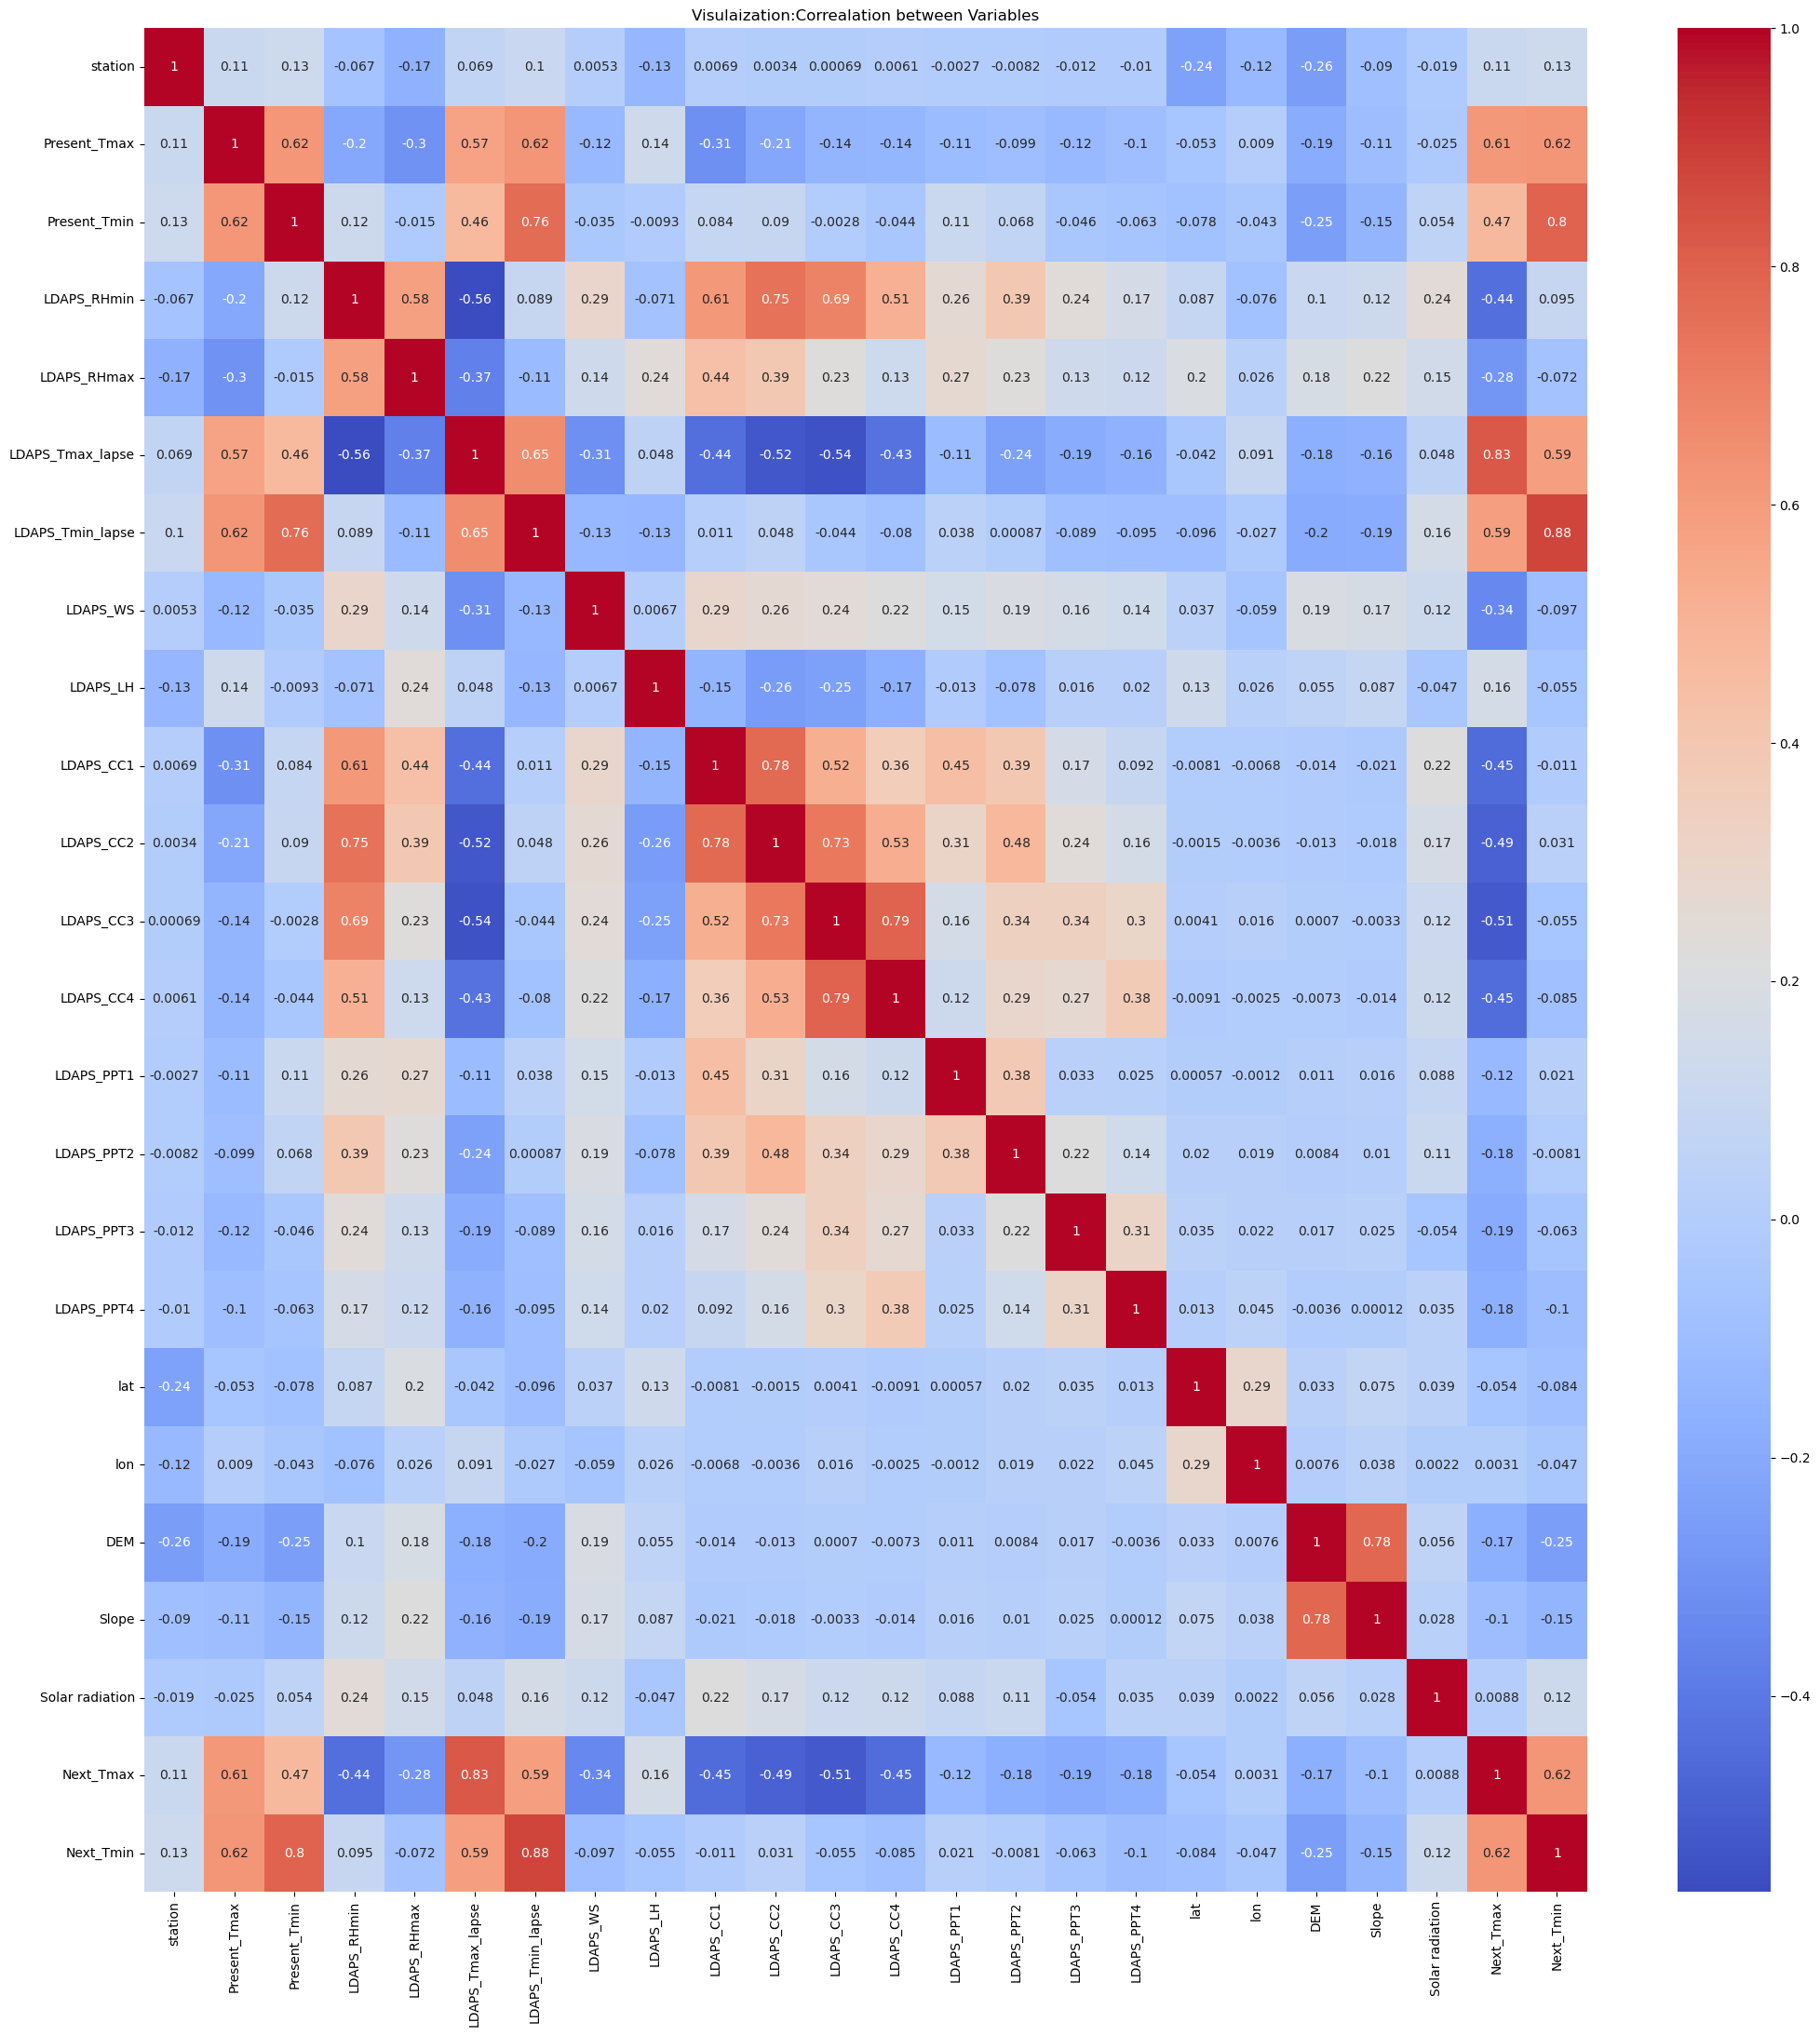

In [16]:
plt.figure(figsize=(25,26), facecolor='w')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Visulaization:Correalation between Variables")
plt.show()

In [17]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,0.003396,0.000694,0.006126,-0.002709,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Present_Tmax,0.112655,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,-0.144018,-0.140729,-0.109006,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,-0.002772,-0.044335,0.112845,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440
LDAPS_CC1,0.006919,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">UNIVARIATE ANALYSIS</span>

In [18]:
df1=df.copy()

In [19]:
# Create a correlation matrix
correlation_matrix = df1.corr()

# Set a correlation threshold
threshold = 0.9

# Find and print highly correlated columns
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print("Highly correlated columns to consider dropping:", highly_correlated)

# Drop the highly correlated columns
df1_dropped = df.drop(columns=highly_correlated)


Highly correlated columns to consider dropping: set()


 <span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">Output is showing an empty set (set()), it means that, based on our specified correlation threshold, there are no pairs of columns with correlations higher than that threshold. In other words, dataset does not currently have columns that are highly correlated with each other, according to the threshold</span>

<Axes: xlabel='station', ylabel='Count'>

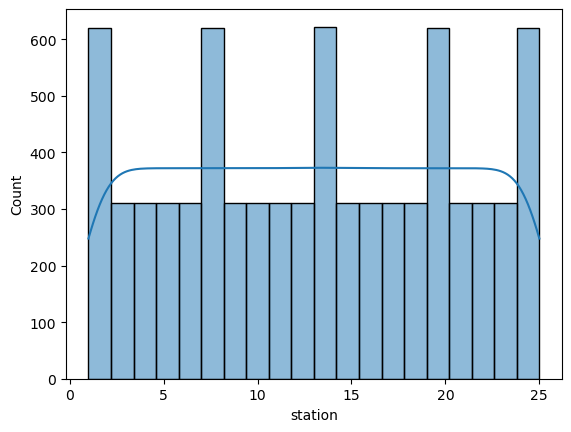

In [20]:
sns.histplot(df['station'],kde=True,)# Use seaborn for the histogram with kernel density estimation


<Axes: xlabel='Date', ylabel='Count'>

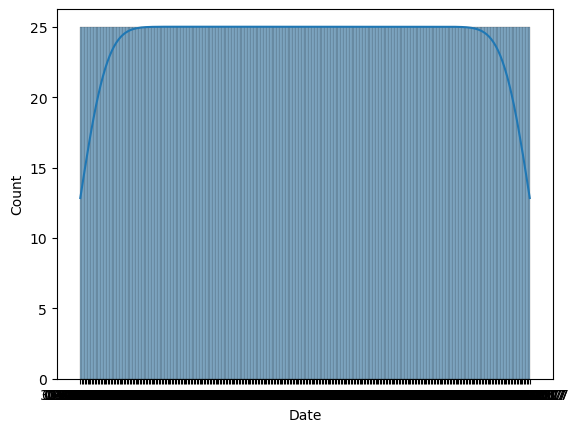

In [21]:
sns.histplot(df['Date'],kde=True,)

<Axes: xlabel='Present_Tmax', ylabel='Count'>

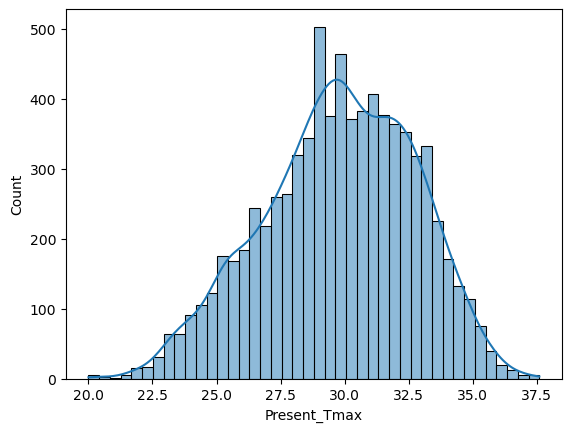

In [22]:
sns.histplot(df['Present_Tmax'],kde=True,)

<Axes: xlabel='Present_Tmin', ylabel='Count'>

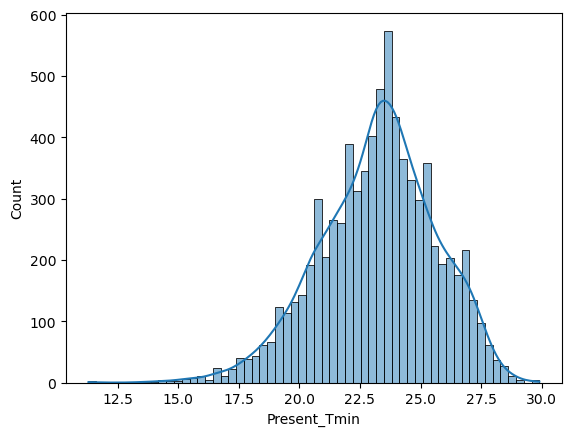

In [23]:
sns.histplot(df['Present_Tmin'],kde=True,)

<Axes: xlabel='LDAPS_RHmin', ylabel='Count'>

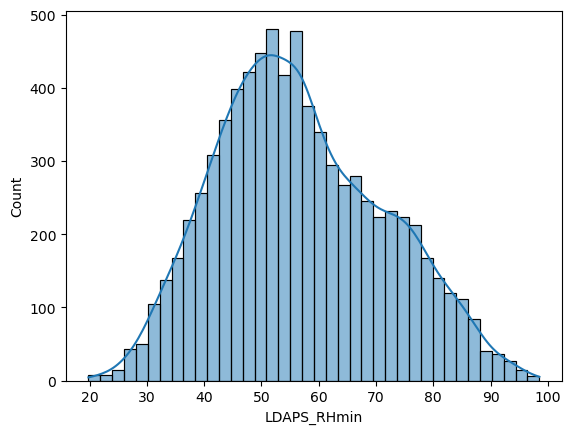

In [24]:
sns.histplot(df['LDAPS_RHmin'],kde=True,)


<Axes: xlabel='LDAPS_RHmax', ylabel='Count'>

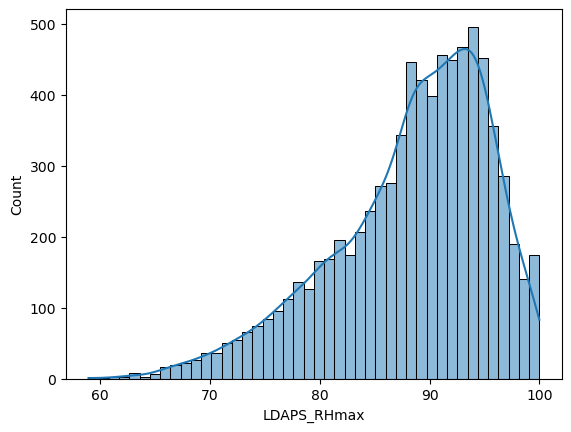

In [25]:
sns.histplot(df['LDAPS_RHmax'],kde=True,)



<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

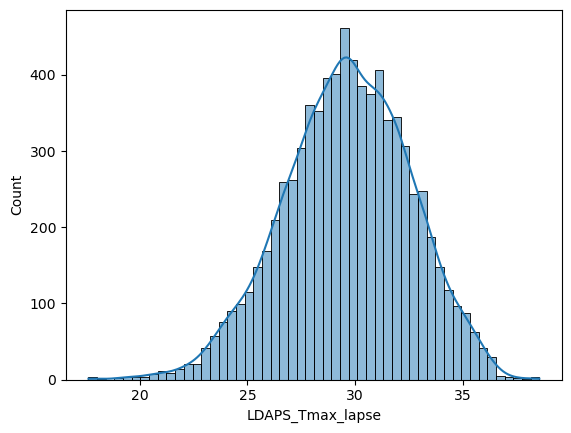

In [26]:
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,)



<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

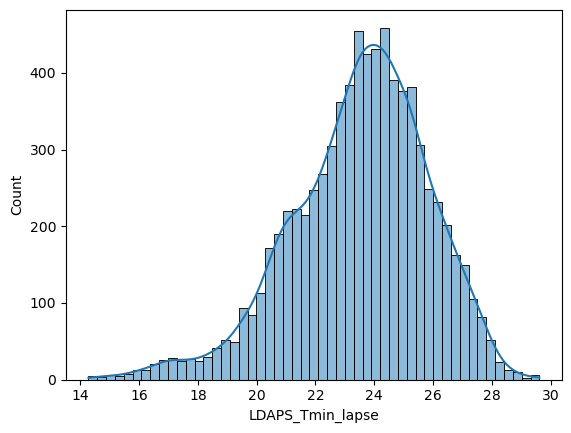

In [27]:
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,)



<Axes: xlabel='LDAPS_WS', ylabel='Count'>

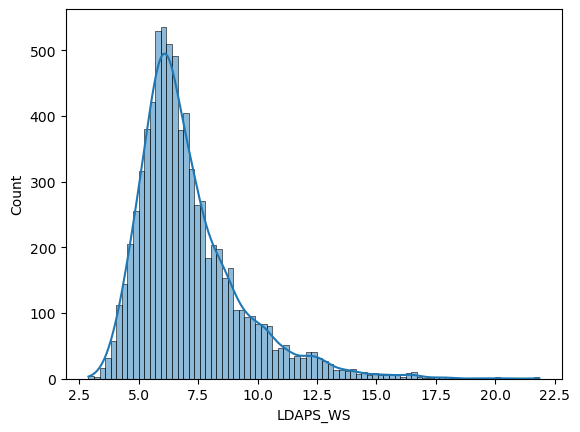

In [28]:
sns.histplot(df['LDAPS_WS'], kde='True')

<Axes: xlabel='LDAPS_LH', ylabel='Count'>

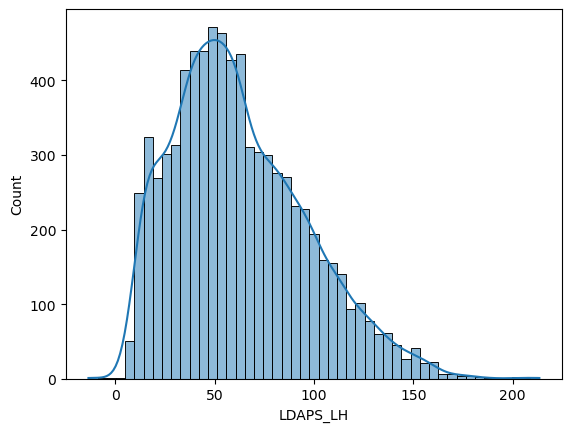

In [29]:
sns.histplot (df['LDAPS_LH'], kde=True)

<Axes: xlabel='LDAPS_CC1', ylabel='Count'>

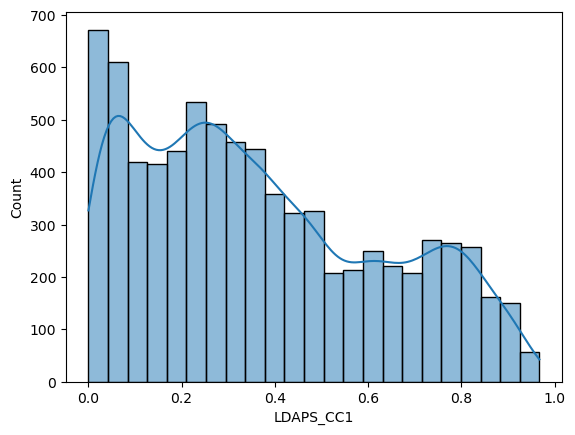

In [30]:
sns.histplot(df['LDAPS_CC1'], kde=True)

<Axes: xlabel='LDAPS_CC2', ylabel='Count'>

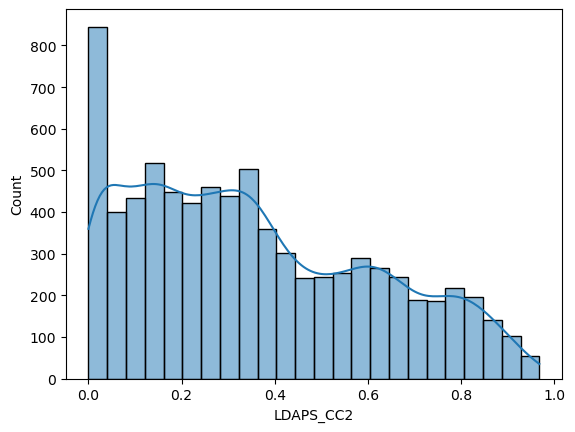

In [31]:
sns.histplot(df['LDAPS_CC2'], kde=True)

<Axes: xlabel='LDAPS_CC3', ylabel='Count'>

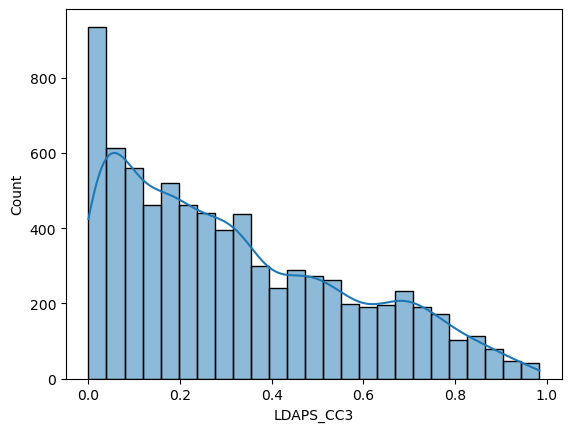

In [32]:
sns.histplot(df['LDAPS_CC3'], kde=True)

<Axes: xlabel='LDAPS_CC4', ylabel='Count'>

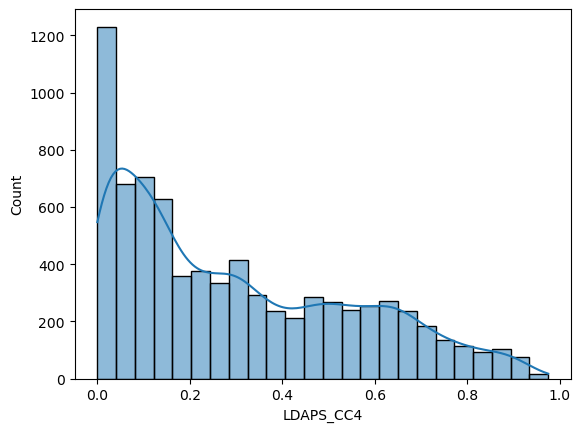

In [33]:
sns.histplot(df['LDAPS_CC4'], kde=True)

<Axes: xlabel='LDAPS_PPT1', ylabel='Count'>

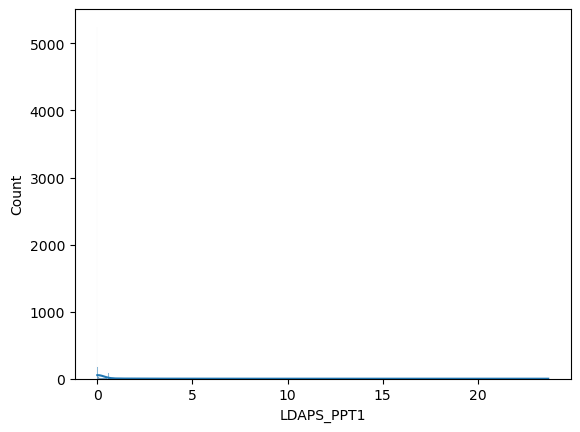

In [34]:
sns.histplot(df['LDAPS_PPT1'], kde=True)

<Axes: xlabel='LDAPS_PPT2', ylabel='Count'>

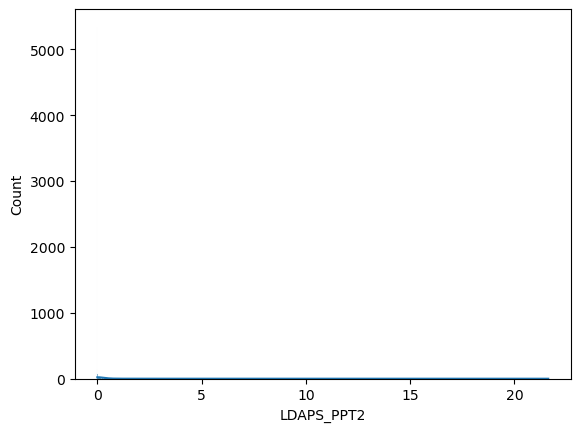

In [35]:
sns.histplot(df['LDAPS_PPT2'], kde=True)

<Axes: xlabel='LDAPS_PPT3', ylabel='Count'>

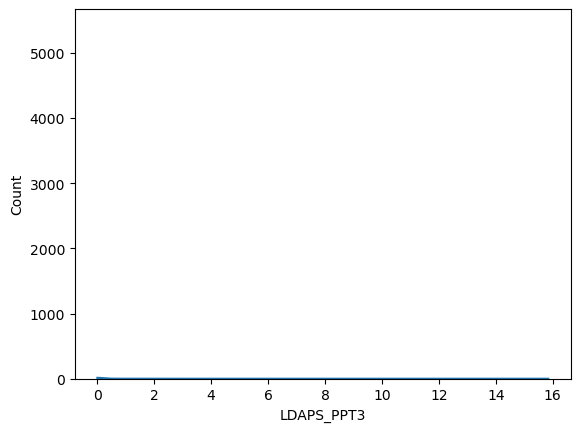

In [36]:
sns.histplot(df['LDAPS_PPT3'], kde=True)

In [37]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [38]:
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

 <span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION - OUTLIERS: BoxPlots</span>

 <span style="color:black;font-size: 15px;font-family: verdana;font-weight: bold ">BoxPlots from Column Two to Fifteen</span>

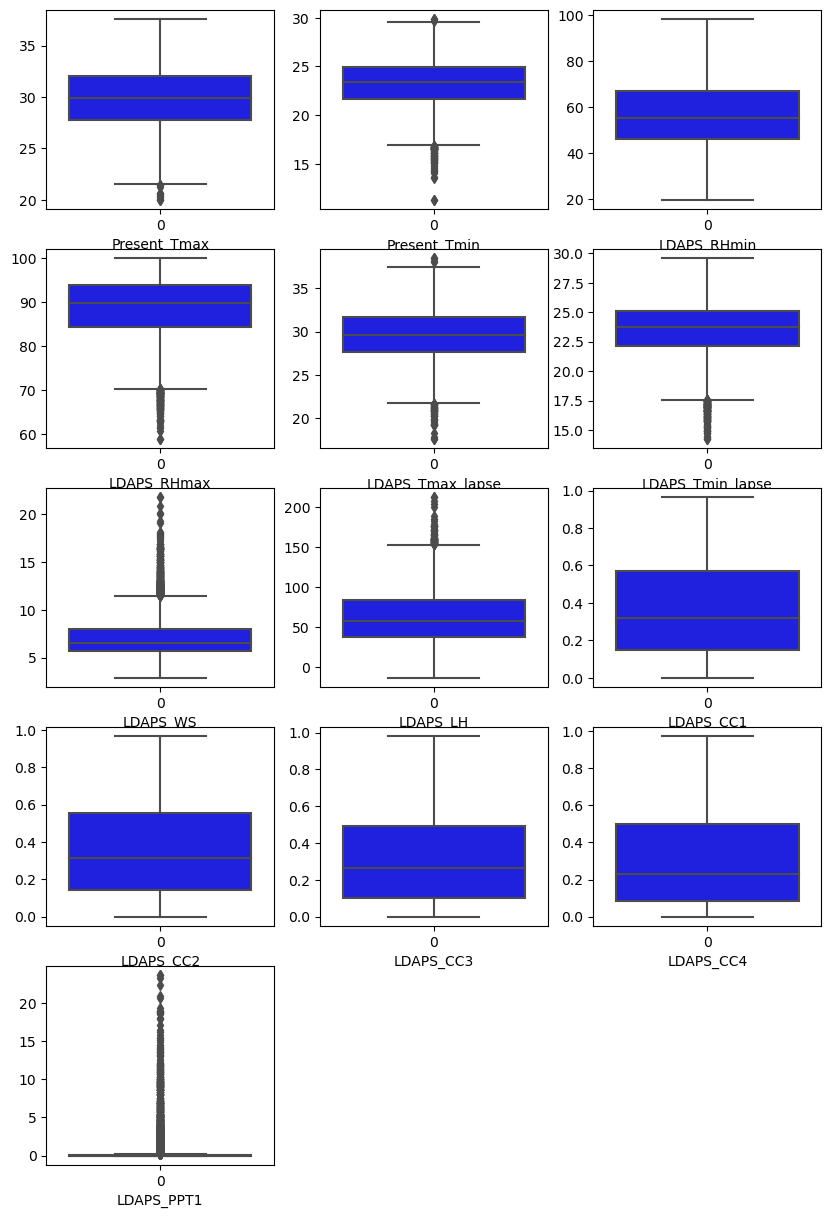

In [39]:
plt.figure(figsize=(10,15), facecolor='w')
pltnum=1
for i in df.columns[2:15]:
    if pltnum<15:
        plt.subplot(5,3,pltnum)
        sns.boxplot(df[i], color='b')
        plt.xlabel (i)
    pltnum+=1
plt.show()


 <span style="color:black;font-size: 15px;font-family: verdana;font-weight: bold ">BoxPlots from Column sixteen to last</span>


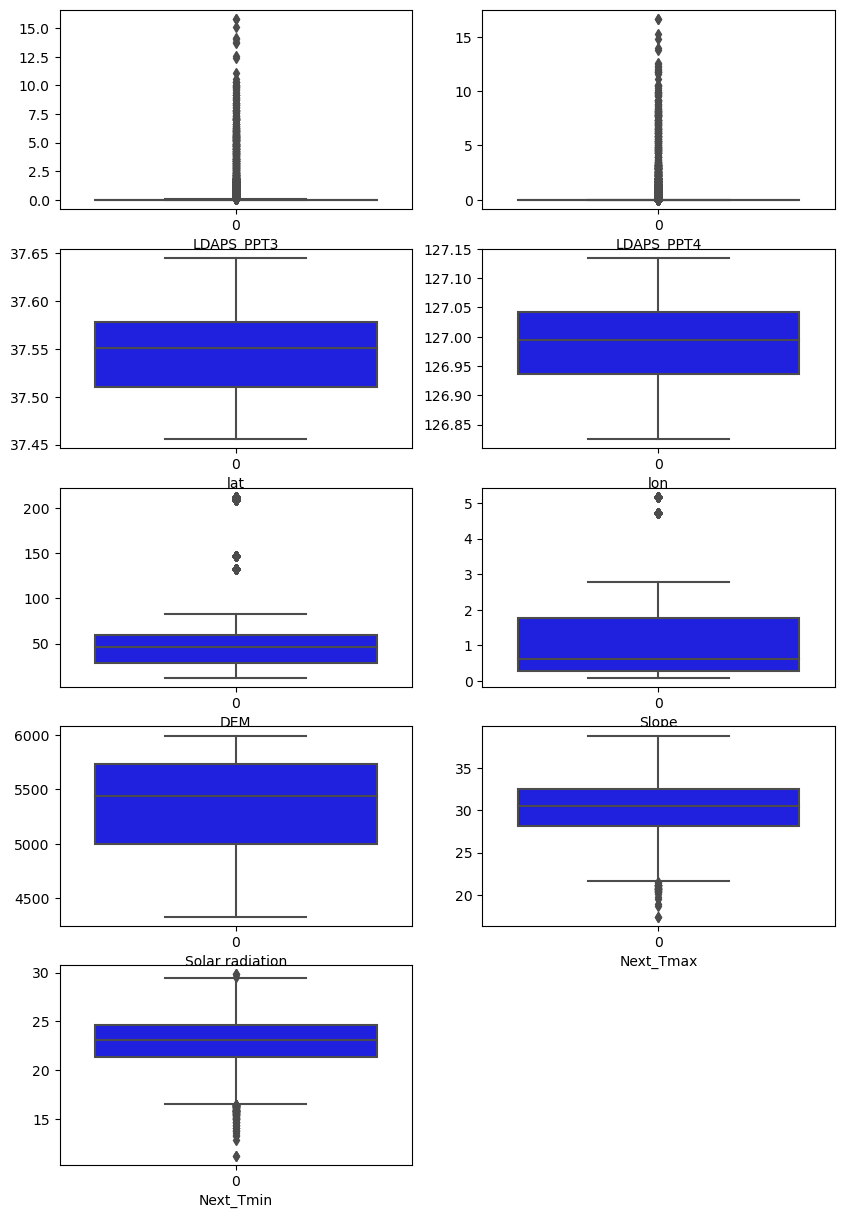

In [40]:
plt.figure(figsize=(10,15), facecolor='w')
pltnum=1
for i in df.columns[16:26]:
    if pltnum<15:
        plt.subplot(5,2,pltnum)
        sns.boxplot(df[i], color='b')
        plt.xlabel (i)
    pltnum+=1
plt.show()


In [41]:
df1.shape

(7752, 25)

In [42]:
from scipy.stats import zscore


In [70]:
numeric_col=df.select_dtypes(include='number').columns
df[numeric_col]=df[numeric_col].apply(zscore)
print(df[numeric_col])

       station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664315     -0.361326     -0.759529     0.102515     0.383078   
1    -1.525622      0.721084     -0.676296    -0.308027     0.311586   
2    -1.386929      0.619608      0.031188    -0.552814    -0.614982   
3    -1.248236      0.754909      0.072805     0.101426     1.133054   
4    -1.109544      0.551957     -0.551446    -0.040098     0.248765   
...        ...           ...           ...          ...          ...   
7747  1.386929     -2.187892     -2.549048    -2.056591    -1.328126   
7748  1.525622     -2.187892     -2.299348    -2.241619    -1.548184   
7749  1.664315     -2.221718     -2.424198    -2.317504    -1.555342   
7750  0.000000     -3.304127     -4.962817    -2.532517    -4.113443   
7751  0.000000      2.649126      2.777891     2.861419     1.624409   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.524889         -0.216663 -0.128382  0.206966

In [71]:
outliers=(np.abs(df[numeric_col] )>3).all(axis=1)
df=df[numeric_col][~outliers]
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,-1.664315,-0.361326,-0.759529,0.102515,0.383078,-0.524889,-0.216663,-0.128382,0.206966,-0.516243,-0.592636,-0.629013,-0.664815,-0.305750,-0.276489,-0.240636,-0.224453,1.189286,-0.005000,2.772243,1.115004,1.517935,-0.376282,-0.697599
1,-1.525622,0.721084,-0.676296,-0.308027,0.311586,0.080895,0.223848,-0.646994,-0.314841,-0.548557,-0.406199,-0.638055,-0.677462,-0.305750,-0.276489,-0.240636,-0.224453,1.189286,0.511177,-0.315157,-0.542158,1.229950,0.072097,-0.174064
2,-1.386929,0.619608,0.031188,-0.552814,-0.614982,0.162936,0.451210,-0.441604,-1.249283,-0.610450,-0.384009,-0.458843,-0.620575,-0.305750,-0.276489,-0.240636,-0.224453,0.653021,0.838510,-0.526218,-0.723133,1.216534,0.264260,0.389744
3,-1.248236,0.754909,0.072805,0.101426,1.133054,0.031092,-0.079874,-0.666247,0.095997,-0.583539,-0.506548,-0.631178,-0.651696,-0.305750,-0.276489,-0.240636,-0.224453,1.991696,0.385280,-0.297588,0.932424,1.201176,0.456422,0.550832
4,-1.109544,0.551957,-0.551446,-0.040098,0.248765,-0.170325,-0.011187,-0.627154,1.354409,-0.832287,-0.413115,-0.559990,-0.510358,-0.305750,-0.276489,-0.240636,-0.224453,0.118743,1.807917,-0.494322,-0.548433,1.207205,0.296287,-0.174064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386929,-2.187892,-2.549048,-2.056591,-1.328126,-1.112066,-2.029679,-0.436683,0.284622,-1.297018,-1.071078,-1.278054,-1.182118,-0.305750,-0.276489,-0.240636,-0.224453,-0.149390,-1.263971,-0.852681,-0.803915,-2.093040,-0.632499,-1.946031
7748,1.525622,-2.187892,-2.299348,-2.241619,-1.548184,-0.887662,-2.047744,-0.255421,-0.454749,-1.274658,-1.094726,-1.278054,-1.182118,-0.305750,-0.276489,-0.240636,-0.224453,-0.417522,-1.037356,-0.821213,-0.755095,-2.104553,-0.536418,-1.664127
7749,1.664315,-2.221718,-2.424198,-2.317504,-1.555342,-0.570780,-2.137962,0.088072,-1.591397,-1.224577,-1.153504,-1.278054,-1.178973,-0.305750,-0.276489,-0.240636,-0.224453,-0.417522,-0.269384,-0.779043,-0.719338,-2.074325,-0.792634,-2.227935
7750,0.000000,-3.304127,-4.962817,-2.532517,-4.113443,-4.087857,-3.959146,-1.939757,-2.267499,-1.412018,-1.386643,-1.278054,-1.182118,-0.305750,-0.276489,-0.240636,-0.224453,-1.758184,-2.082302,-0.911963,-0.845455,-2.358212,-4.123453,-4.684525


 <span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION - AFTER OUTLIERS REMOVAL: BOXPLOTS</span>

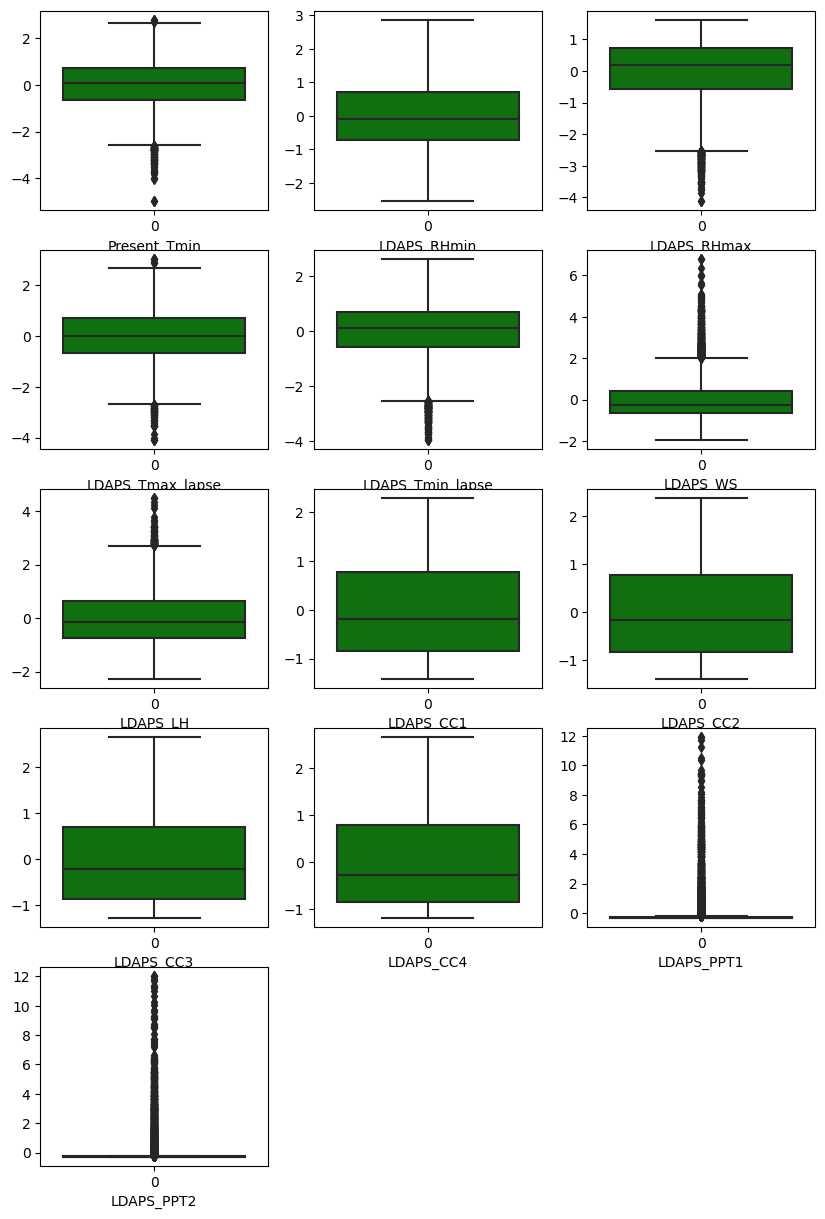

In [73]:
plt.figure(figsize=(10,15), facecolor='w')
pltnum=1
for i in df.columns[2:15]:
    if pltnum<15:
        plt.subplot(5,3,pltnum)
        sns.boxplot(df[i], color='g')
        plt.xlabel (i)
    pltnum+=1
plt.show()

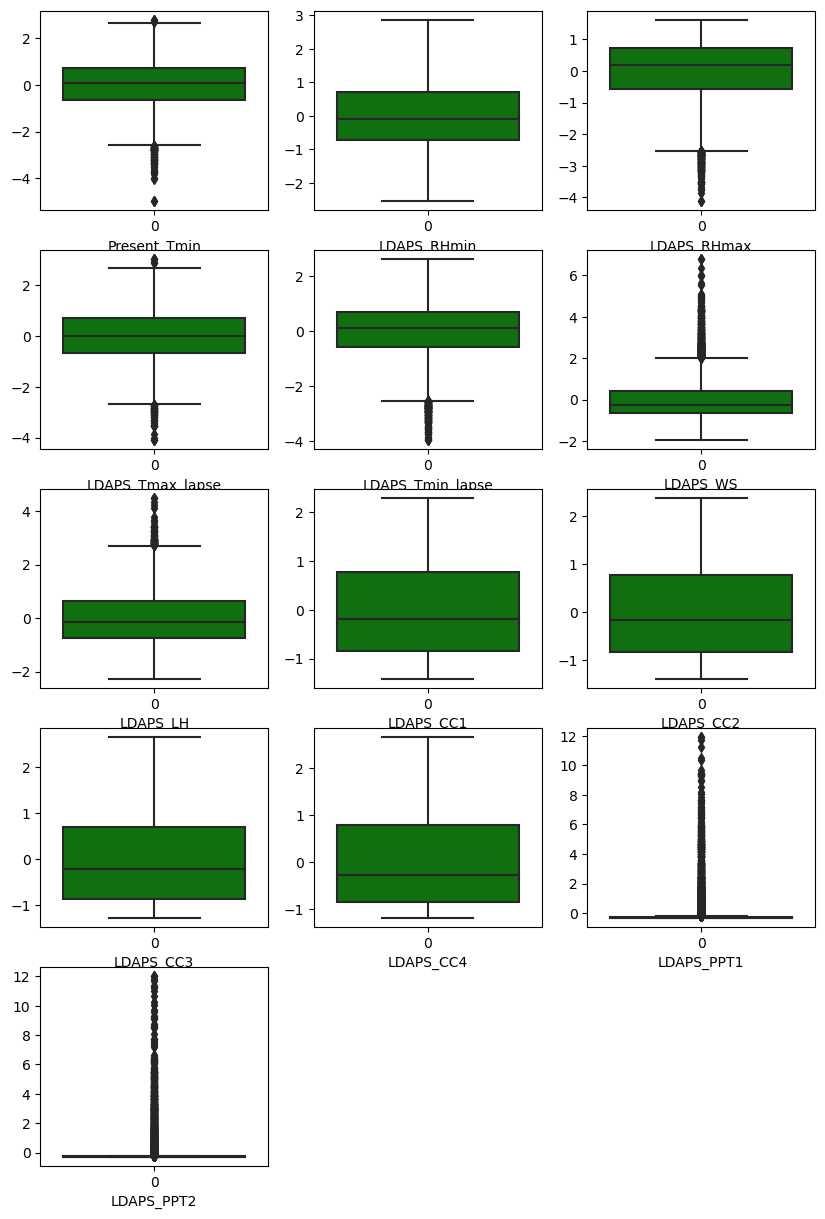

In [45]:
plt.figure(figsize=(10,15), facecolor='w')
pltnum=1
for i in df2.columns[2:15]:
    if pltnum<15:
        plt.subplot(5,3,pltnum)
        sns.boxplot(df2[i], color='g')
        plt.xlabel (i)
    pltnum+=1
plt.show()


 <span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION - CHECKING SKEWNESS: DISTPLOTS</span>

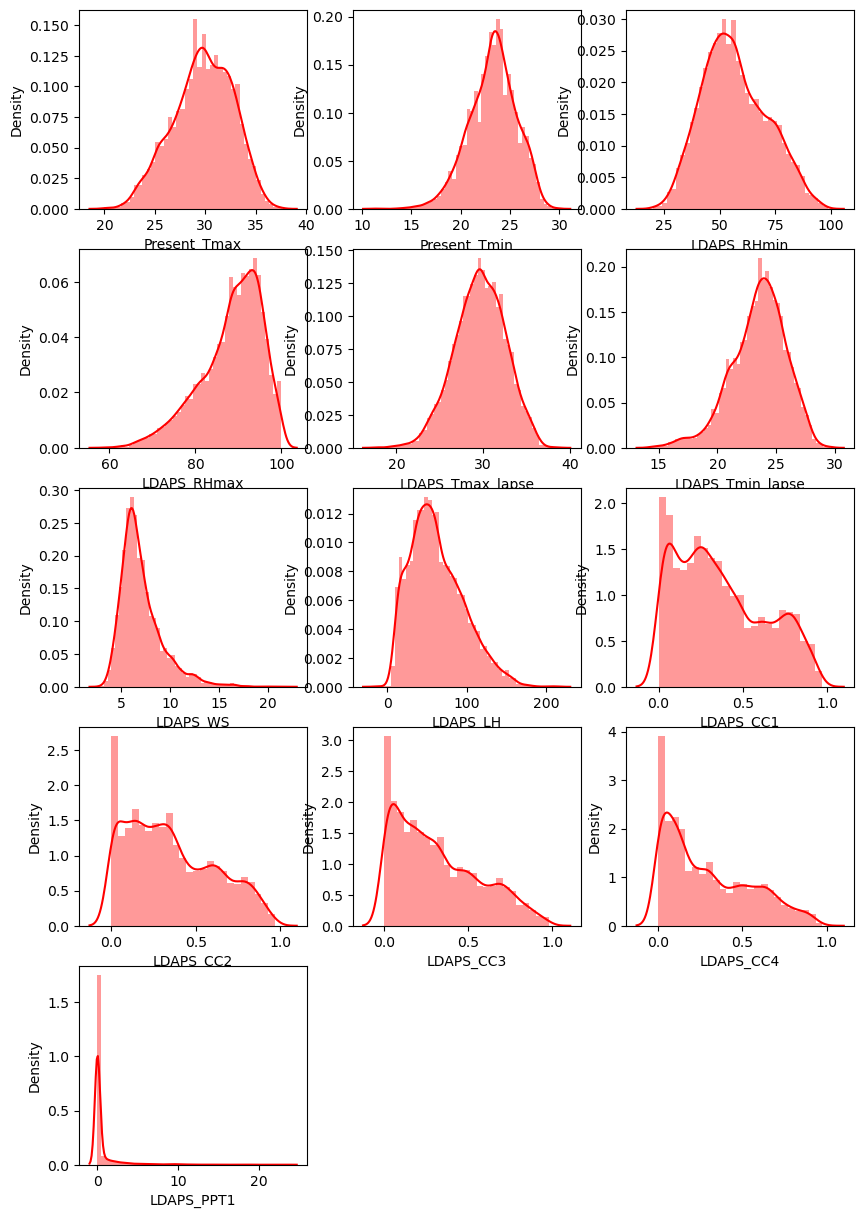

In [47]:
plt.figure(figsize=(10,15), facecolor='w')
pltnum=1
for i in df.columns[2:15]:
    if pltnum<15:
        plt.subplot(5,3,pltnum)
        sns.distplot(df[i], color='r')
        plt.xlabel (i)
    pltnum+=1
plt.show()


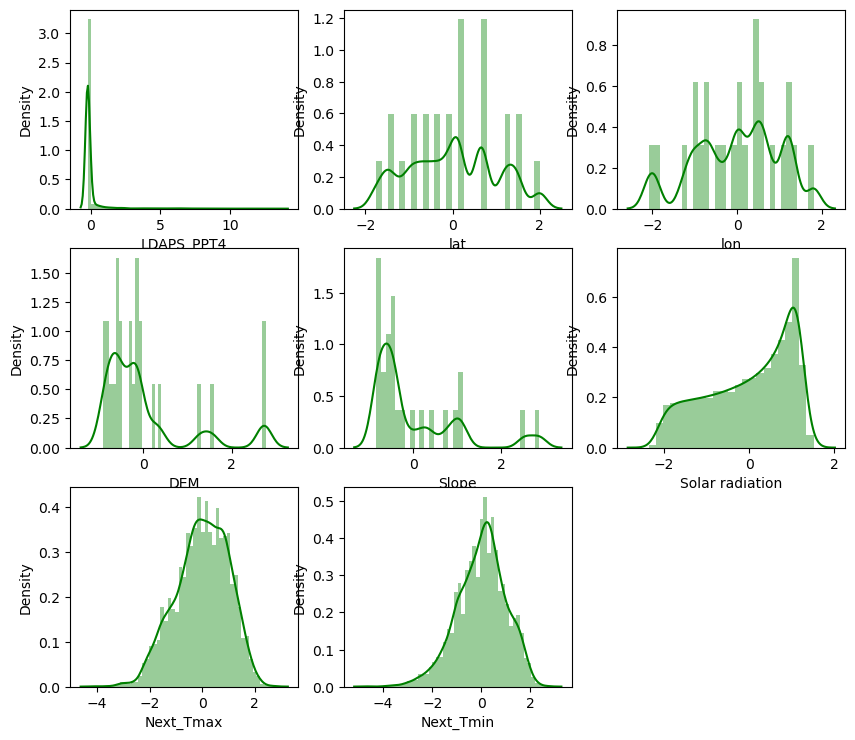

In [74]:
plt.figure(figsize=(10,15), facecolor='w')
pltnum=1
for i in df.columns[16:26]:
    if pltnum<15:
        plt.subplot(5,3,pltnum)
        sns.distplot(df[i], color='g')
        plt.xlabel (i)
    pltnum+=1
plt.show()

 <span style="color:red;font-size: 22px;font-family: verdana;font-weight: bold ">The ideal skewness depends on the context of  data and the assumptions of the statistical analysis  plan to perform. 
However, in many cases:.</span>


 <span style="color:red;font-size: 22px;font-family: verdana;font-weight: bold ">
Skewness around 0 indicates a relatively symmetric distribution.</span>

 <span style="color:red;font-size: 22px;font-family: verdana;font-weight: bold ">The ideal skewness depends on the context of  data and the assumptions of the statistical analysis  plan to perform. 
Skewness between -0.5 and 0.5 is considered approximately symmetric.</span>


 <span style="color:red;font-size: 22px;font-family: verdana;font-weight: bold ">The ideal skewness depends on the context of  data and the assumptions of the statistical analysis  plan to perform. 
Skewness less than -1 or greater than 1 indicates a moderately skewed distribution.</span>


 <span style="color:red;font-size: 22px;font-family: verdana;font-weight: bold ">The ideal skewness depends on the context of  data and the assumptions of the statistical analysis  plan to perform. 
Skewness less than -2 or greater than 2 indicates a highly skewed distribution.</span>

In [49]:
df1[numeric_col].keys()

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [57]:
from scipy.stats import skew, boxcox
import pandas as pd
import numpy as np

# Assuming df1 is your original DataFrame, and df2 is a new DataFrame for the transformed data
df2 = df1.copy()

numeric_cols = df1.select_dtypes(include=np.number).columns

for col in numeric_cols:
    skewness = skew(df1[col])

    if abs(skewness) > 0.5:
        if skewness > 0:
            # Apply log transformation for positively skewed data
            df2[col] = np.log1p(df1[col])
        else:
            # Apply reciprocal transformation for negatively skewed data
            df2[col] = 1 / (df1[col] + 1)


print("Skewness of each numerical column:")
print(df1[numeric_cols].apply(lambda x: skew(x)))


Skewness of each numerical column:
station            -1.604037e-17
Present_Tmax       -2.640861e-01
Present_Tmin       -3.674666e-01
LDAPS_RHmin         3.001617e-01
LDAPS_RHmax        -8.548491e-01
LDAPS_Tmax_lapse   -2.278354e-01
LDAPS_Tmin_lapse   -5.816507e-01
LDAPS_WS            1.578930e+00
LDAPS_LH            6.736270e-01
LDAPS_CC1           4.593689e-01
LDAPS_CC2           4.722584e-01
LDAPS_CC3           6.406115e-01
LDAPS_CC4           6.663527e-01
LDAPS_PPT1          5.392777e+00
LDAPS_PPT2          5.774237e+00
LDAPS_PPT3          6.455880e+00
LDAPS_PPT4          6.824144e+00
lat                 8.704499e-02
lon                -2.851578e-01
DEM                 1.722924e+00
Slope               1.562718e+00
Solar radiation    -5.111108e-01
Next_Tmax          -3.401341e-01
Next_Tmin          -4.043692e-01
dtype: float64


In [91]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In [69]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [110]:
X=df.drop(['Next_Tmax','Next_Tmin'], axis=1)
X

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,2013-06-30 00:00:00.000000000,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996
1,2.0,2013-06-30 00:00:00.000000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500
2,3.0,2013-06-30 00:00:00.000000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664
3,4.0,2013-06-30 00:00:00.000000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844
4,5.0,2013-06-30 00:00:00.000000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30 00:00:00.000000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965
7748,24.0,2017-08-30 00:00:00.000000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535
7749,25.0,2017-08-30 00:00:00.000000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215
7750,13.0,2015-07-19 15:52:15.483870976,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508


In [111]:
Y=df['Next_Tmax']
Y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

In [100]:
df['Date'].isnull().sum()

2

In [101]:
df['Date'].nunique()

310

In [104]:
df['Date'].dtypes

dtype('O')

In [106]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [107]:
mean_date = df['Date'].mean()
df['Date'] = df['Date'].fillna(mean_date)


In [108]:
df['Date'].isnull().sum()

0

In [114]:
X.drop(['Date'], axis=1)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508


In [125]:
X.keys()

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation'],
      dtype='object')

In [130]:
X=X.drop(['Date'], axis=1)

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Scaling of Data: MINMAX SCALER</span>

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.6643153 , -0.36132577, -0.75952931, ...,  2.77224286,
         1.11500407,  1.51793488],
       [-1.52562236,  0.72108401, -0.6762959 , ..., -0.31515742,
        -0.54215762,  1.22994952],
       [-1.38692941,  0.61960809,  0.03118815, ..., -0.52621832,
        -0.7231326 ,  1.21653443],
       ...,
       [ 1.6643153 , -2.22171758, -2.42419767, ..., -0.77904331,
        -0.71933797, -2.0743251 ],
       [ 0.        , -3.30412736, -4.9628169 , ..., -0.91196325,
        -0.8454552 , -2.35821196],
       [ 0.        ,  2.64912642,  2.77789093, ...,  2.77224286,
         2.86143459,  1.51793488]])

<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [136]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.30)

In [137]:
X_train.shape

(5426, 22)

In [138]:
X_test.shape

(2326, 22)

In [139]:
Y_train.shape

(5426,)

In [140]:
Y_test.shape

(2326,)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Importing Machine learning Model library</span>


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Finding Best Random State</span>


In [152]:
minMSE = float('inf')
#Note: This line initializes a variable named minMSE and sets its value to positive infinity (float('inf')). 
#In Python, float('inf') represents positive infinity, which is a special floating-point value representing an unbounded positive quantity.
bestRandomState = 0

for i in range(2, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    current_mse = mean_squared_error(Y_test, pred)
    
    if current_mse < minMSE:
        minMSE = current_mse
        bestRandomState = i

    print("VAlue of MSE is ", minMSE, " at Random State ", bestRandomState)

print("Minimum MSE is ", minMSE, " at Random State ", bestRandomState)

VAlue of MSE is  2.3359256961039194  at Random State  2
VAlue of MSE is  2.25907181446818  at Random State  3
VAlue of MSE is  2.2176537086341512  at Random State  4
VAlue of MSE is  2.2176537086341512  at Random State  4
VAlue of MSE is  2.2176537086341512  at Random State  4
VAlue of MSE is  2.2176537086341512  at Random State  4
VAlue of MSE is  2.2176537086341512  at Random State  4
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue of MSE is  2.168201531124965  at Random State  9
VAlue

<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">Minimum MSE is  2.123822666973014  at Random State  79</span>


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">LINEAR REGRESSION MODEL </span>

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=79)
Lr=LinearRegression()
Lr.fit(X_train,Y_train)
pred_Lr=Lr.predict(X_test)
pred_train=Lr.predict(X_train)
#mean_sq_err=mean_squared_error(pred,Y_test)
#print(mean_sq_err)

print("r_2 score", r2_score(Y_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_Lr)))

r_2 score 0.7795135303787781
r_2 score on Training Data 0.7630343661079563
Mean Absolute Error: 1.1123698559210913
Mean Square Error: 2.123822666973014
Root Square Error: 1.4573340958658085


<span style="color:Blue;font-size: 20px;font-family: verdana;font-weight: bold ">RANDOM FOREST REGRESSOR </span>


In [156]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_RFR)))

r_2 score 0.8963025539944963
r_2 score on Training Data 0.9848569520336852
Mean Absolute Error: 0.7315489585855124
Mean Square Error: 0.9988594162355859
Root Square Error: 0.9994295454085725


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">K NEAREST NEIGHBOR </span>

In [155]:
knn=KNN()
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_knn ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_knn)))

r_2 score 0.8369652770703977
r_2 score on Training Data 0.8861251082577225
Mean Absolute Error: 0.9462811109534265
Mean Square Error: 1.5704221699245122
Root Square Error: 1.2531648614306548


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">GRADIENT BOOSTING REGRESSOR </span>


In [158]:
gbb=GradientBoostingRegressor()
gbb.fit(X_train,Y_train)
pred_gbb=gbb.predict(X_test)
pred_train=gbb.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_gbb)))

r_2 score 0.8500445207676416
r_2 score on Training Data 0.8693930368664305
Mean Absolute Error: 0.9189872868235056
Mean Square Error: 1.444437141098068
Root Square Error: 1.2018473867750714


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">LASSO MODEL </span>

In [159]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
lasso.fit(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_lasso)))

r_2 score 0.5987834016434717
r_2 score on Training Data 0.5770976630372406
Mean Absolute Error: 1.5639768018585856
Mean Square Error: 3.8646947697936485
Root Square Error: 1.9658826948202297


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">RIDGE MODEL </span>

In [160]:
rd=Ridge()
rd.fit(X_train,Y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_rd ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_rd)))

r_2 score 0.7795283947676983
r_2 score on Training Data 0.7630342508121428
Mean Absolute Error: 1.11229859716747
Mean Square Error: 2.123679486640118
Root Square Error: 1.4572849709786064


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Decision Tree Regressor </span>


In [161]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_dtr)))

r_2 score 0.7561399207842243
r_2 score on Training Data 1.0
Mean Absolute Error: 1.0919386588084048
Mean Square Error: 2.348967556594455
Root Square Error: 1.5326341887725379


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SVR MODEL </span>

In [162]:
svr= SVR()
svr.fit(X_train, Y_train)
svr.fit(X_train,Y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_svr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_svr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_svr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_svr)))

r_2 score 0.8498680580298779
r_2 score on Training Data 0.8653178220386909
Mean Absolute Error: 0.8652068459473387
Mean Square Error: 1.4461369078138326
Root Square Error: 1.2025543263461458


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Extra Trees Regressor </span>

In [163]:
etr=ExtraTreesRegressor()
etr.fit(X_train,Y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_etr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_etr)))

r_2 score 0.9188948343535466
r_2 score on Training Data 1.0
Mean Absolute Error: 0.6505262311230579
Mean Square Error: 0.7812406335157684
Root Square Error: 0.8838781779836905


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Linear Regression and Cross Validation Score</span>

In [164]:
score=cross_val_score(Lr, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_Lr )- score.mean())

[0.67058987 0.66420462 0.70194815 0.79039559 0.68861246]
0.7031501370168677
Difference between r_2 score and Cross Validation score is 0.07636339336191045


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Random Forest Regression and Cross Validation Score</span>

In [165]:
score1=cross_val_score(RFR, X, Y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_RFR )- score1.mean())

[0.70743035 0.64933634 0.63605479 0.7964664  0.63328046]
0.6845136702309536
Difference between r_2 score and Cross Validation score is 0.21178888376354277


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of SVR and Cross Validation Score</span>

In [167]:
score7=cross_val_score(svr, X, Y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_svr )- score7.mean())

[0.64089808 0.60978118 0.68563776 0.73675027 0.65876242]
0.666365942094876
Difference between r_2 score and Cross Validation score is 0.18350211593500187


<span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Extra Tree Regressor and Cross Validation Score</span>

In [168]:
score8=cross_val_score(etr, X, Y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_etr )- score8.mean())

[0.69763182 0.6409481  0.64010878 0.79417406 0.66564281]
0.6877011136233804
Difference between r_2 score and Cross Validation score is 0.2311937207301662


<span style="color:blue;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>


In [176]:
import joblib
joblib.dump(etr,'PowerPlant.pkl')

['PowerPlant.pkl']